# 总结

1. 背景
    - 线性回归的分类的问题
        - 1. 线性回归的计算结果当成概率？
        - 2. 线性回归的模型建立输入值，输出值基础上（整个模型不是基于分类：基于预测规律：预测的可靠性，通过拟合度来度量）。

2. 逻辑回归的模型的前提条件：
    - 线性模型的输出，假设是概率；. 
    - 建立模型的时候，一开始建立的是一个分类模型

3. 逻辑回归模型
    - **线性** **概率** **分类**模型：
        - $y_A = xW_A；\qquad;y_A\text{是x属于A类的概率}$
        - $y_B = xW_B；\qquad;y_B\text{是x属于B类的概率}$

4. 误差模型（算法：统计学习范畴）
    - 统计学习通用模型（分析问题的入口模型）：误差模型；
        - $y_A = xW_A + \epsilon _A；\qquad;y_A\text{是x属于A类的概率}$
        - $y_B = xW_B + \epsilon _B；\qquad;y_B\text{是x属于B类的概率}$

5. 简单的形式推导
    - 合并上面的误差模型
        - $ y = \begin{cases} 
        0,  \qquad xW_A +\epsilon_A - xW_B - \epsilon _B >0    \\
        1,    \qquad  xW_A +\epsilon_A - xW_B - \epsilon _B<=0  \\
        \end{cases}$
        - $ y = \begin{cases} 
        0,  \qquad xW +\epsilon >0    \\
        1,    \qquad  xW+\epsilon <=0  \\
        \end{cases}$

- 更新以后的分类模型
    - $ y = \begin{cases} 
        0,  \qquad xW +\epsilon >0    \\
        1,    \qquad  xW+\epsilon <=0  \\
        \end{cases}$

- 假设概率计算误差遵循正态分布
    - $\epsilon_A$ ~ $N(\mu,\sigma^2)$
    - $\epsilon_B$ ~ $N(\mu,\sigma^2)$
    - $\epsilon = \epsilon_A -\epsilon_B$ ~ ?  
    
    - 计算$p(\epsilon)$ 服从实际上二项分布
        - $p(\epsilon_x) =  p_{\epsilon _A} ^{\epsilon}   p_{\epsilon_B} ^{1-\epsilon}$   误差产生的概率

- 计算出误差的概率公式：
    - $p_{\epsilon_A} = F(0, \sigma ^ 2)$   : 误差在某范围内的概率：概率累积函数
    - $L(W) = \prod (p_{\epsilon} )^{\epsilon} (1- p_{\epsilon} )^{1- \epsilon}$
    
    - $p(\epsilon)$是正态分布的累积概率
    - 正态分布没有累积函数，所有使用逻辑分布替代（是因为累积概率在只是-1.7的时候，非常接近），使用逻辑分布费累积函数计算误差的概率。

- 损失函数
    - 概率似然函数
        - $L(W) = \prod (p_{\epsilon} )^{\epsilon} (1- p_{\epsilon} )^{1- \epsilon}$
    - 根据似然函数求最大值，推导
        - $𝐿𝑜𝑠𝑠=𝐽(𝑊)=−𝑙(𝑊)=−𝑙𝑛(𝐿(𝑊))=−∑𝑖𝑦𝑖 𝑙𝑛(ℎ(𝑋𝑖))+(1−𝑦𝑖)ln(1−ℎ(𝑋𝑖))$

- 统计学习的最终模型（梯度下降）：
    - 值的计算模型
        - $y = S(xW)$     # 分类：预测模型
        - $y=S^{-1}(y)= xW$
    - 损失函数
        - 求最小值

# 逻辑回归模型求解？
    
    - 梯度下降法
    

## S函数的可视化

- 逻辑概率密度累积函数： $S(x) = \dfrac{1}{1 + e ^{-x}}$ 

- S函数的导数：逻辑概率密度函数
    - $p(x) = \dfrac{e ^ {-x}}{ (1 + e ^{-x}) ^2}$
    
    
- 背景：
    - 正态分布的概率密度函数没有累积分布函数
    - 正态概率密度分布函数：
        - $p(x) = \dfrac{1}{\sqrt{2 \pi} \sigma}  e^{- \dfrac{ (x-\mu)^2} { 2 \sigma ^2}}$

- $S(x) = \int _{-\infty} ^ x\dfrac{e^{-z}}{(1+ e ^{-z})^2}dz = \dfrac{1}{1+e^{-x}}$

- $F(x) =  \int _{-infty} ^ x    \dfrac{1}{\sqrt{2 \pi} \sigma}  e^{- \dfrac{ (z-\mu)^2} { 2 \sigma ^2}} dz = \text{不存在一个函数可以表示这个积分}$ 

    - 使用逻辑分布替代正态分布
        - 不是逻辑密度函数与正态分布的密度接近，而是积分结果函数的值接近。

- 练习
    - 绘制逻辑分布密度函数与正态分布密度函数
    - 绘制S函数与正态分布的累积函数曲线（无法使用公式表达）

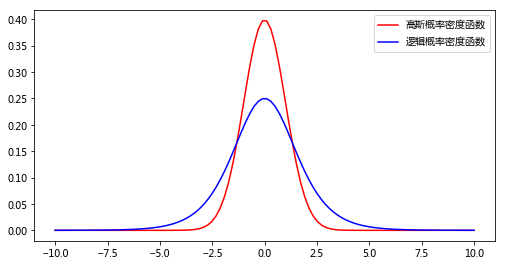

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# 构建绘图环境
figure = plt.figure('逻辑分布与正态分布：密度函数', figsize=(8, 4))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8])

# 准备图的数据（x【连续线性的数据】，y【使用函数公式计算或者积分计算】）
x = np.linspace(-10,10, 100)

def func_normal(x_, mu_, sigma_):
    c1 = 1.0 / np.sqrt(2 * np.pi ) * sigma_
    exp = - (x_ - mu_) ** 2 / 2.0 * ( sigma_ ** 2)
    c2 = np.exp( exp )
    return   c1 * c2

def func_logistic(x_):
    c1 = np.exp(- x_)
    c2 = (1.0 + c1 ) ** 2
    return c1 / c2

y_normal =  func_normal(x, 0,  1)
y_logistic = func_logistic(x)

# 绘制图形（修饰）
ax.plot(x, y_normal, color=(1, 0, 0, 1), label='高斯概率密度函数')
ax.plot(x, y_logistic, color=(0, 0, 1, 1), label='逻辑概率密度函数')

ax.legend()
plt.show()

- 高斯分布与逻辑分布，他们的概率密度函数存在差距

- 高斯概率密度累积分布 与 逻辑概率密度累积分布

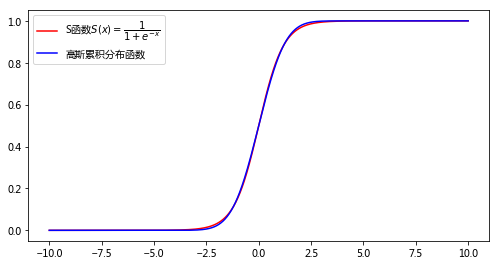

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as it   # 积分计算函数 

# 准备绘图环境
figure = plt.figure('S函数与高斯累积分布函数', figsize=(8, 4))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8])

# 准备数据（计算积分）
x = np.linspace(-10,10, 1000)

def func_normal(x_, mu_, sigma_):
    c1 = 1.0 / np.sqrt(2 * np.pi ) * sigma_
    exp = - (x_ - mu_) ** 2 / 2.0 * ( sigma_ ** 2)
    c2 = np.exp( exp )
    return   c1 * c2

def func_S(x_):
    return 1.0 / ( 1.0 + np.exp( - 1.702 * x_ ) )   # 调整x的系数

def func_F(x_, mu_, sigma_):
    # 对func_normal函数进行积分
    r = it.quad(    # 只支持标量计算
        func_normal,   # 被积分的函数
        -np.inf,           # 积分的下限
        x_,                 # 积分的上限
        args=(mu_,  sigma_) 
    )   # 返回二元元组：第一个是积分，第二个是积分误差上限
    return r[0]  # 积分的结果


# print(func_F(1.0, 0.0, 1.0))
y_S = func_S(x)
y_F = [func_F(x_, 0.0, 1.0) for x_ in  x ]   # 生成器表达式=等同于lambda表达式

#  y_F = func_F(x)   # 因为积分函数quad不支持数据序列,，使用生成器表达式替换序列（[], ndarrary, DataFrame）

# 绘制曲线
ax.plot(x, y_S, color=(1, 0, 0, 1), label='S函数$S(x) = \dfrac{1}{1 + e ^{-x}}$')
ax.plot(x, y_F, color=(0, 0, 1, 1), label='高斯累积分布函数')

ax.legend()
plt.show()

- 使用逻辑分布替代高斯分布的原因：累积函数在逻辑分布取系数1.702的时候，完全接近。

### 关于S函数

- $S(x)$函数是逻辑概率密度函数的积分。
- $S(x)$函数的导数是逻辑概率密度函数。
    - $S ^ \prime (x) = \dfrac{e ^{-x}}{(1 + e ^{-x})^2} = S(x)(1-S(x)) = \dfrac{1}{1 + e ^{-x}}  (1-  \dfrac{1}{1 + e ^{-x}})$

- 写一个程序验证。

- 逻辑回归的
    -  $Loss=J(W)=-l(W)=-ln(L(W))=-\sum\limits_{i}y_i\ ln(h(X_i)) +(1-y_i)\ln(1-h(X_i))$      
    - 上述公式被称为交叉熵（Cross   Entropy）  
    - 其中$h(X_i)=S(X_iW)= \dfrac{1}{1+e^{-X_iW}}$ 

- 求损失函数的最小值
    - 找到W使得损失函数最小。
    - 以W为未知元，求损失函数的最小值。
    
    - 损失函数凸函数。
        - 因为凸函数，所以存在最小值。
    

- 梯度下降法的原理
    - 永远找不到最小值
    - 算法：
        - 如果初始化W，计算出在这个W点处的导数< 0  ：W在最小值的W0的左边，如果想接近，就增加W。
        - 导数>0 W在最小值右边，如果想接近，就减少W。
        - 这个循环n次，有理由相信，得到W就近最小值W0

- 梯度下降法的关键值：
    - 方向
        - 最小值为拐点：左右觉得（损失函数的导数：切线：斜率：）右边：>0 左边 <0
        - W的增量的大小。

- 梯度算法：
    - 给定初始W（随机）
    - 决定方向：
        - 求这个W处的导数，>0 则减一个增量， <0 加上增量   $\Delta _W$
        - 为了增量，在增量增加一个系数 $\eta$  
        
        - $W_{new} = W_{old} - \eta \Delta_W $  按照这个公式，循环n次以后，我们有理由相信，最后W就是使损失最小的W。
            - $\Delta _W$取成损失函数在$W$处的导数。
        

- 梯度下降的核心：
    - 取$\eta$很关键：经验。
    - 决定方向很重要：导数（计算机是无法求导数：找到一个求导数的方法）。
    

- $loss = -ln L $ 似然函数

- $J =loss (y)= - \sum \limits _{i=1} ^ n  y_i ln y_i  + (1- y_i) ln(1-y_i)$

- $  \dfrac{ \partial {J}} {\partial{ y}}$

- $y = S(\bar{x})$

- $J =loss (\bar{x})= - \sum \limits _{i=1} ^ n  S(\bar{x_i}) ln S(\bar{x_i})  + (1- S(\bar{x_i})) ln(1-S(\bar{x_i}))$

- $  \dfrac{ \partial {J}} {\partial{ \bar{x}}}$

- $J =loss (W)= - \sum \limits _{i=1} ^ n  S(x_iW) ln S(x_iW)  + (1- S(x_iW)) ln(1-S(x_iW))$

$\bar{x} = xW$

- $  \dfrac{ \partial {J}} {\partial{ W}}$

- $y =S(xW)$   逻辑回归的模型
    - 正向求值

- $  \dfrac{ \partial {J}} {\partial{ W}}$

- $\dfrac{\partial{J}}{\bar{x}}    \dfrac{\partial{\bar{x}}}{\partial{W}}$

- $\dfrac{\partial{J}}{\partial\bar{x}}    \dfrac{\partial{ \bar{x} } }{ \partial{y} }   \dfrac{\partial{y}}{\partial{W}}$
    - 逆向求求导（增量：W的梯度方向）

- 最好的形式： $\dfrac{\partial{J}}{\partial{y}}    \dfrac{\partial{ y } }{ \partial{\bar{x}} }   \dfrac{\partial{\bar{x}}}{\partial{W}}$
    - 逆向求求导（增量：W的梯度方向）

- $y =S(\bar{x})$ 
- $\bar {x} = xW$

-  $\dfrac{\partial{J}}{\partial{y}}    \dfrac{\partial{ y } }{ \partial{\bar{x}} }   x$

-  $\dfrac{\partial{J}}{\partial{y}}   S^{\prime}(\bar{x})  x$

-  $ \nabla _W= loss ^{\prime}(y)   S^{\prime}(\bar{x})  x$

- $loss= \sum (y_i - x_iW) ^2$  ：线性回归的梯度下降也可以简单实现。

- $J =loss (y)= - \sum \limits _{i=1} ^ n  y_i ln y_i  + (1- y_i) ln(1-y_i)$ ： 逻辑回归的损失函数

# 逻辑回归的梳理


- 分类模型：
    - $p(x) = S(xW) $
        - 根据计算的结果，得到概率p，根据概率就可以进行分类。

- W的更新模型：
    - $W_{new} = W_{old} - \eta \nabla _W$

- 更新量的计算
    - $\nabla _W = loss ^{\prime}(y) * S^{\prime}(\bar{x})  x $

- 导数公式
    - 损失函数的导数
        - $J^\prime(\bar{y_i})=- \dfrac{1}{m} \sum\limits_{i=1}^{m}\dfrac{y_i-\bar{y_i}}{\bar{y_i}(1-\bar{y_i})}$ 
    - 逻辑分布函数的导数
        - $S^{\prime}(x) = S(x)(1-S(x))$